In [1]:
import sys
sys.path.insert(0, '../')
from lib import *

from scipy.stats import norm
from scipy.optimize import curve_fit

%matplotlib inline

DEBUG = False;

# Define Gaussian function
def gaussian(x, mu, sigma,A):
    return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

No handles with labels found to put in legend.


ChargeRangeAverageWvf
1.0061773590851044
1.0200712937743992


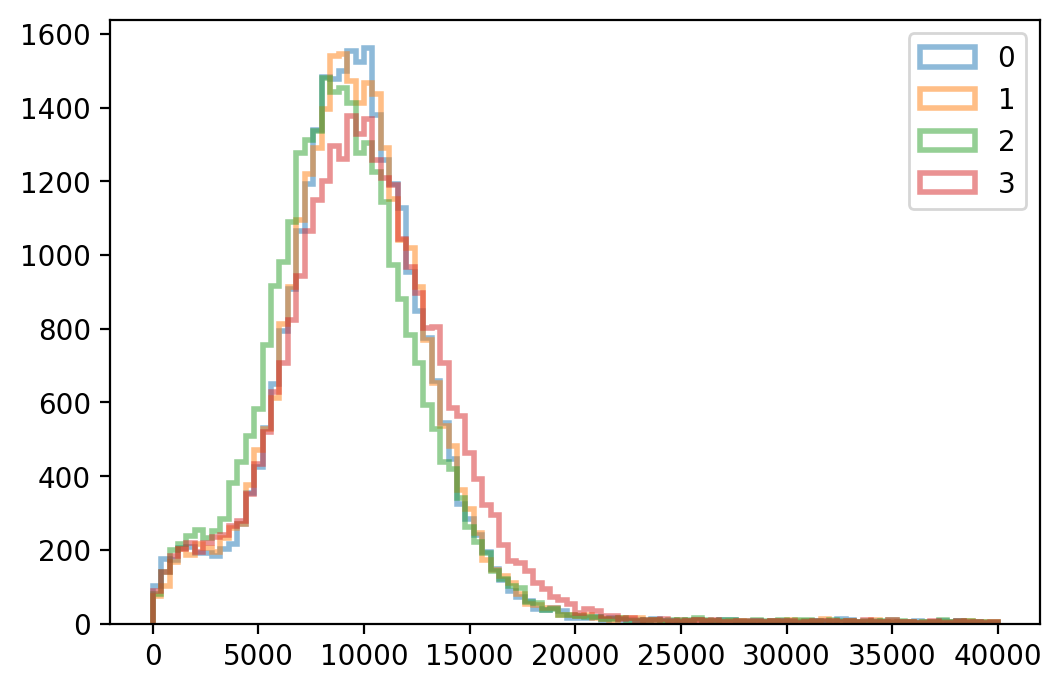

In [20]:
WEEK="DAPHNE_VUV";
# WEEK="DAPHNE_VIS";
compress=False

path="/scr/neutrinos/rodrigoa/"+WEEK+"/joython/"
Runs=open_runs_table("../macros/"+WEEK+".xlsx")
OV=9

Runs=Runs[(Runs["Type"]=="Alpha") &( Runs["OverVoltageXA"]==OV)]
Runs.iloc[1]

run=3

def charge_ratio(charge):
    SiPMs_12=(charge[0]+charge[1])
    SiPMs_34=(charge[2]+charge[3])
    return SiPMs_12/SiPMs_34

# for chargemode in ["ChargePeakRange","ChargeRangeAverageWvf","ChargeRange","ChargeRangeRelativeAmp"]:
for chargemode in ["ChargeRangeAverageWvf"]:
    plt.figure(dpi=200)
    charge =[]
    charge2=[]
    for ch in [0,1,3,4]:
        
        if ch<3:ADCsxticks2PE=GetGains(WEEK,OV)[ch]
        else   :ADCsxticks2PE=GetGains(WEEK,OV)[ch-1]

        run_path=path+"run"+str(run).zfill(2)+"/";
        Charge_vars  =open_ch_var(run_path ,"Charge_vars" ,ch,compressed=compress)
        
        hist, bins = np.histogram(Charge_vars[chargemode]*ADCsxticks2PE,100,[0,40])

        popt, _ = curve_fit(gaussian, bins[:-1], hist,[16,5,852])
        
        # plt.hist(Charge_vars[chargemode]*ADCsxticks2PE,100,[0,40],alpha=.5,histtype="step",linewidth=2)
        plt.hist(Charge_vars[chargemode],100,[0,.4e5],alpha=.5,histtype="step",linewidth=2)

        # plt.figure()
        # plt.plot(bins[:-1], gaussian(bins[:-1], *popt), 'r-', label='Gaussian Fit')
        
        
        # # Calculate chi-squared per degree of freedom
        # residuals = hist - gaussian(bins[:-1], *popt)
        # chi_squared = np.sum((residuals)**2 / hist)  / (len(hist) - 3)    
        # Print chi-squared per degree of freedom
        # print(f"Chi-squared per degree of freedom: {chi_squared:.3f}")


        charge.append(np.mean(Charge_vars[chargemode]*ADCsxticks2PE))
        charge2.append(popt[0])

    plt.legend()
    print(chargemode)
    print(charge_ratio(charge ))
    print(charge_ratio(charge2))    
    
    plt.legend(["0","1","2","3"])
